$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

# Vorticity-Streamfunction Formulation
We start with an incompressible, constant density Navier-Stokes equation in absence of body forces and in two dimensions:

$$\pad{\vb{u}}{t}+\vb{u}\cdot\nabla\vb{u}=-\frac{1}{\rho}\nabla p+\nu\nabla^2\vb{u}\quad,$$

and apply the curl operator, i.e. $\nabla\times$ on the equation. We use the vorticity vector $\nabla\times\vb{u}=\va{\omega}=\omega\,\vb{e_3}$.
The vorticity vector has only one component. Then the momentum equation transforms to the vorticity transport equation

$$\pad{\omega}{t}+\vb{u}\cdot\nabla\omega=\nu\nabla^2\omega.$$

You may notice that the pressure term has been removed as the curl of a gradient is always 0. Some of the term were taken off because of the incompressibility condition, $\nabla\cdot\vb{u}=0$.

Now we have one equation for the 3 unknowns $(u_1,u_2,\omega)$ and need to utilize the divergence free condition of the velocity field. Writing the velocities through streamfunctions, we automatically fullfill this condition. Let's do this now:

$$u_1=\pad{\psi}{x_2}\quad\quad u_2=-\pad{\psi}{x_1}\quad .$$

Then we insert these expressions into the equation for the vorticity and obtain

$$\omega=\pad{u_2}{x_1}-\pad{u_1}{x_2}=-\ppad{\psi}{x_1}-\ppad{\psi}{x_2}$$

or

$$\nabla^2\psi=-\omega\quad .$$

The last equation is a Poisson equation for the streamfunction. Combing this Poisson equation with the vorticity transport equation we obtain 2 equations for the 2 unkowns, vorticity and streamfunction, $(\omega,\psi)$ and can solve the problem. This way of writing the Navier Stokes equation is named the *Vorticity-Streamfunction* formulation.

## Discretization
We now dicretize the transport equation and the Poisson equation. A straightforward way is to use the Forward-Time Central-Space scheme (FTCS) for the transport equation.
Let's write it down:

$$\frac{\omega^{n+1}_{ij}-\omega^n_{ij}}{\Delta t}+u_{ij}\left(\frac{\omega^n_{i+1,j}-\omega^n_{i-1,j}}{2\Delta x_1}\right)+v_{ij}\left(\frac{\omega^n_{i,j+1}-\omega^n_{i,j-1}}{2\Delta x_2}\right)=\nu\left(\frac{\omega^n_{i+1,j}-2\omega^n_{ij}+\omega^n_{i-1,j}}{\Delta x^2_1}+\frac{\omega^n_{i,j+1}-2\omega^n_{ij}+\omega^n_{i,j-1}}{\Delta x^2_2}\right)$$

To be stable the CFL conditions

$$\frac{\nu\Delta t}{\Delta x_1^2}+\frac{\nu\Delta t}{\Delta x_2^2}\leq\frac{1}{2}$$

and

$$ \frac{U \Delta t}{\Delta x}\leq\frac{1}{2}$$

must be met.

Assuming a homogeneous spacing $\Delta x_1=\Delta x_2=\Delta x$ we can write the explicit finite difference scheme as:

$$\omega^{n+1}_{ij}=\omega^n_{ij}-\frac{\Delta t}{4 \Delta x^2}\left[
\left(\psi^n_{i,j+1}-\psi^n_{i,j+1}\right)\left(\omega^n_{i+1,j}-\omega^n_{i-1,j}\right)+
\left(\psi^n_{i-1,j}-\psi^n_{i+1,j}\right)\left(\omega^n_{i,j+1}-\omega^n_{i,j-1}\right)\right]+
\frac{\nu \Delta t}{\Delta x^2} \left(\omega^n_{i+1,j}+\omega^n_{i,j+1}-4\omega_{ij}+\omega^n_{i-1,j}+\omega^n_{i,j-1}\right)
$$
Here, the definition of the velocity through the streamfunction was inserted.



The Possion equation for the streamfunction can be readily approximated using a 2nd order central differencing scheme:

$$\frac{\psi^{n+1}_{i+1,j}-2\psi^{n+1}_{ij}+\psi^{n+1}_{i-1,j}}{\Delta x^2_1}+\frac{\psi^{n+1}_{i,j+1}-2\psi^{n+1}_{ij}+\psi^{n+1}_{i,j-1}}{\Delta x^2_2}=-\omega^{n+1}_{ij}$$

### Boundary conditions:
We need to specify the boundary conditions on the domain. That means, we need the values for $\psi$ and $\omega$. As we can identify $\psi$=const. along streamlines, their values can be easily related to the geometry.

The value of the vorticty on the boundaries is a bit harder to obtain.

#### No slip boundaries
The velocity $\vb{u}=0$ on stationary no slip boundaries, thus $\pad{\psi}{x}=\pad{\psi}{y}=$const. The constant is free to choose, yet has to be the same if boundaries meet. If a boundary is moving, at a constant velocity (as for the cavity-lid problem) the value of spatial derivative is given e.g. $\pad{\psi}{y}=U_{wall}$. 

Poisson equation dictates that at vertical boundaries

$$\omega_{wall}=-\ppad{\psi}{x}$$
and at horizontal boundaries

$$\omega_{wall}=-\ppad{\psi}{y}$$

We can obtain that second derivative using the Taylor approximation up to second order for a cell just outside in the fluid domain. For generality let us do this for the cell next to a moving wall. 

$$\psi_{i,j=2}=\psi_{i,j=1}+\pad{\psi_{i,j=1}}{x_2}\Delta x_2+\ppad{\psi_{i,j=1}}{x_2}\frac{\Delta x_2}{2}+O(\Delta x_2^3)$$

Consider a horizontally moving wall of velocity $\pad{\psi}{x_2}=U_{wall}$, then we can solve for the vorticity on the wall, i.e. for $-\ppad{\psi}{y}$:

$$\omega_{i,j}=-\frac{2 U_{wall}}{\Delta x_2}-\frac{2}{\Delta x^2_2}\psi_{i,j=2}+O(\Delta x_2)$$

Similarily for vertical walls with velocity $U_{wall}$ we obtain

$$\omega_{i,j}=-\frac{2 U_{wall}}{\Delta x_1}-\frac{2}{\Delta x^2_1}\psi_{i=2,j}+O(\Delta x_1)$$

This can simplified if we have the same grid spacing in $x_1$ and $x_2$-direction to

$$\psi^{n+1}_{ij}=\frac{\Delta x^2}{4}\omega^{n+1}_{ij}+\frac{1}{4}\left(\psi^{n+1}_{i+1,j}+\psi^{n+1}_{i-1,j}+\psi^{n+1}_{i,j+1}+\psi^n_{i,j-1}\right)$$

Solving this implicit equation one would need to solve $N^2$ equations where N is the number of gridpoints in each direction. This can be done with a variety of linear algebra solver

Here we want to look at exlicit schemes to keep the algorithmic complexity small.

## Jacobi's iterative method
The simplest way to solve the Poisson equation is successive approximation through iteration, termed Jacobi's iterative method. Here the solution of the equation is guessed and this guess is improved through iterations, i.e. that mean we start with a wrong solution $\psi^n$ which is inserted in the discretization equation, the scheme is applied and the solution taken as a new guess. Over many iterations eventually $\psi^n$ converges to $\psi^{n+1}$:

$$\psi^{n+1}_{ij}=\frac{\Delta x^2}{4}\omega^n_{ij}+\frac{1}{4}\left(\psi^n_{i+1,j}+\psi^n_{i-1,j}+\psi^n_{i,j+1}+\psi^n_{i,j-1}\right).$$

##Gauss-Seidel method
This is a modification of the Jacobi method, which converges slightly faster. If we are sweeping through the grid with increasing $i$ and $j$ then the left and lower neightbor on the the grid has been already updated. Gauss-Seidel method makes use of these values, increasing convergence time.

$$\psi^{n+1}_{ij}=\frac{\Delta x^2}{4}\omega^n_{ij}+\frac{1}{4}\left(\psi^n_{i+1,j}+\psi^{n+1}_{i-1,j}+\psi^n_{i,j+1}+\psi^{n+1}_{i,j-1}\right).$$




##Successive Over Relaxation (SOR)


<img src="../pics/fd_fig1.png" width=450>

Figure taken from Oleg Zikanov "Essential Computational Fluid Dynamics" showing on the left the process leading to Successive Overrelaxation and on the right Successive Underrelaxtion. The approach is that an improved step is 
$\vb{v}^*=\vb{v}^n+\alpha(\vb{v}^{n+1}-\vb{v}^n)$. Then $\vb{v}^*$ is a better approximation. For SOR $\alpha$ is between 1 and 2. The scheme can be translated to the Poisson equation as:

$$\psi^{n+1}_{ij}=(1-\alpha)\psi^n_{ij}+\alpha\left[\frac{\Delta x^2}{4}\omega^n_{ij}+\frac{1}{4}\left(\psi^n_{i+1,j}+\psi^{n+1}_{i-1,j}+\psi^n_{i,j+1}+\psi^{n+1}_{i,j-1}\right)\right].$$




# Implementation
We start first with solving the Poisson Equation. Below code has implemented three functions using the different schemes. Please note that the first method (Jacobi's method) implements the parallel array access, while the other two methods (Gauss-Seidell and SOR) use the indexing of the arrays.


In [17]:
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

err_val=0.0001 #maximum relative error
maxiter=500 #maximum number of iteration 

#helper function to return the relative error
def relerror(old,new):
    i=np.where(abs(new) > 0)
    err=np.mean(((new[i]-old[i])/new[i])**2.)
    return err

#helper function to plot a 3d graph
def myplot3d(X,Y,data):
    fig = plt.figure(figsize=(5,5), dpi=100)
    ax = fig.gca(projection='3d')                      
    surf = ax.plot_wireframe(X,Y,data[:])
    
def solvePoisson_Jacobi(p,f,deltax):
    iter=0
    
    while True:
        pn=p.copy()
        iter=iter+1
        p[:]=0
        #boundary conditions
        pn[0,:] = 0
        pn[-1,:] = 0
        pn[:,0] = 0
        pn[:,-1] = 0
        #finite difference scheme
        p[1:-1,1:-1]=0.25*(deltax*deltax*f[1:-1,1:-1]+(pn[1:-1,2:]+pn[1:-1,0:-2]+pn[2:,1:-1]+pn[0:-2,1:-1]))
        #stop if relative error is below bound
        if relerror(pn,p)<err_val:
            break
        if iter>maxiter:
            break
    #print iter
    #print relerror(pn,p)
    return p

def solvePoisson_GaussSeidel(p,f,deltax):
    iter=0
    while True:
        pn=p.copy()
        p[:]=0.
        iter=iter+1
        
        #boundary conditions
        pn[0,:] = 0
        pn[-1,:] = 0
        pn[:,0] = 0
        pn[:,-1] = 0
        #finite difference scheme
        for i in range(1,p.shape[0]-1): 
            for j in range (1,p.shape[1]-1):
                p[i,j]=0.25*(deltax*deltax*f[i,j]+pn[i,j+1]+p[i,j-1]+pn[i+1,j]+p[i-1,j])
        #stop if relative error is below bound
        if relerror(pn,p)<err_val:
            break
        if iter>maxiter:
            break
    #print iter
    #print relerror(pn,p)
    return p

#@autojit
def solvePoisson_SOR(p,f,deltax):
    iter=0
    beta=1.12
    while True:
        pn=p.copy()
        iter=iter+1
        
        #boundary conditions
        pn[0,:] = 0
        pn[-1,:] = 0
        pn[:,0] = 0
        pn[:,-1] = 0
        #finite difference scheme
        for i in range(1,p.shape[0]-1): 
            for j in range (1,p.shape[1]-1):
                p[i,j]=(1-beta)*pn[i,j]+0.25*beta*(deltax*deltax*f[i,j]+pn[i,j+1]+p[i,j-1]+pn[i+1,j]+p[i-1,j])

                #stop if relative error is below bound
        if relerror(pn,p)<err_val:
            break
        if iter>maxiter:
            break
    #print iter
    #print relerror(pn,p)
    return p



CPU times: user 217 ms, sys: 2.59 ms, total: 220 ms
Wall time: 220 ms
CPU times: user 3.44 s, sys: 14.8 ms, total: 3.45 s
Wall time: 3.46 s
CPU times: user 1.05 s, sys: 13.5 ms, total: 1.07 s
Wall time: 1.08 s


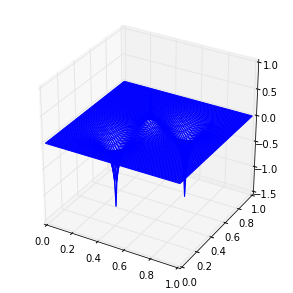

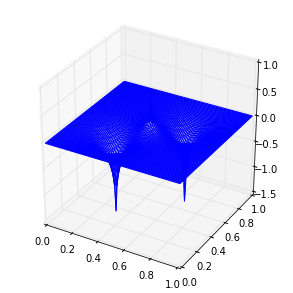

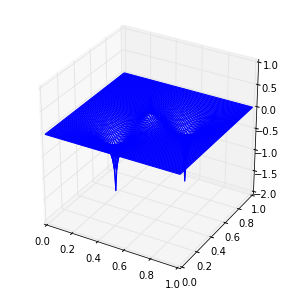

In [18]:
#arrays
n=101
L=1.#length 
deltax=L/n
p = np.zeros((n,n))
f = np.zeros((n,n))
x = y = np.linspace(0, L, n)
X, Y = np.meshgrid(x,y) #needed for plotting

#Set values of the Poisson function
f[n/2,n/2]=1./deltax/deltax
f[n/3,n/3]=-2./deltax/deltax
f[2*n/3,2*n/3]=-2./deltax/deltax

#Now we test the three differen approaches
#Only the Jacobi method is parallized
%time p1=solvePoisson_Jacobi(p,f,deltax)
myplot3d(X,Y,p1)
%time p1=solvePoisson_GaussSeidel(p,f,deltax)
myplot3d(X,Y,p1)
%time p1=solvePoisson_SOR(p,f,deltax)
myplot3d(X,Y,p1)


Now we need to implement the vorticity transport equation and the boundary conditions.

CFL1=0.147
CFL2=0.042
Re=40.0


/Users/cdohl/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/cdohl/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


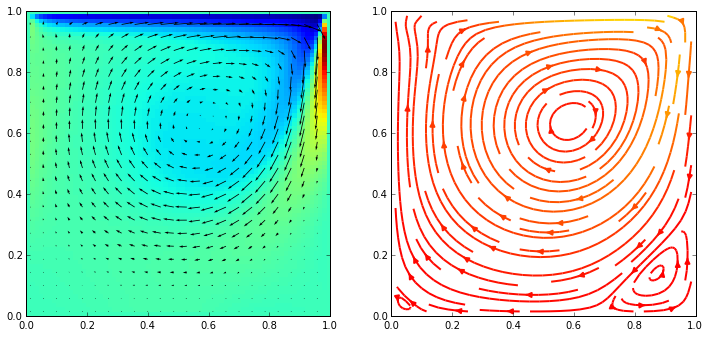

In [3]:
maxstep=4000 #number of steps
n=71 #grid
L=1.#length 
deltax=L/(n-1)
ps = np.zeros((n,n)) #Psi
om = np.zeros((n,n)) #omega
x = y = np.linspace(0, L, n)
Uwall=2.0 #velocity of the wall
nu=0.05 #kinematic viscosity
deltat=0.0003 #delta t

CFL1=2.*nu*deltat/deltax/deltax #should be smaller than 1/2
print "CFL1={0}".format(CFL1)
CFL2=Uwall*deltat/deltax #should be smaller than 1/2
print "CFL2={0}".format(CFL2)
Re=L*Uwall/nu
print "Re={0}".format(Re)
for tstep in range(maxstep):
    #Poisson Solver
    ps=solvePoisson_Jacobi(ps,om,deltax)
    #Boundary conditions for the vorticity
    omc=om.copy()
    omc[1:-1,0]=-2.0*ps[1:-1,1]/deltax/deltax #bottom wall
    omc[1:-1,-1]=-2.0*ps[1:-1,-2]-2.0*Uwall/deltax #top wall
    omc[0,1:-1]=-2.0*ps[1,1:-1]/deltax/deltax #left wall
    omc[-1,1:-1]=-2*ps[-2,1:-1]/deltax/deltax #right wall
    
    #Finite difference scheme for the vorticity transport equation: omega^n_ij=omega^n_ij+A+B
    A=-deltat/4./deltax/deltax*((ps[1:-1,2:]-ps[1:-1,0:-2])*(omc[2:,1:-1]-omc[0:-2,1:-1])+\
                               (ps[0:-2,1:-1]-ps[2:,1:-1])*(omc[1:-1,2:]-omc[1:-1,0:-2]))
    B=nu*deltat/deltax/deltax*(omc[2:,1:-1]+omc[1:-1,2:]-4*omc[1:-1,1:-1]+omc[0:-2,1:-1]+omc[1:-1,0:-2])
    om[1:-1,1:-1]=omc[1:-1,1:-1]+A+B

#Now calculate the velocity vectors    
u1=(ps[1:-1,2:]-ps[1:-1,0:-2])/2./deltax
u2=-(ps[2:,1:-1]-ps[0:-2,1:-1])/2./deltax
X, Y = np.meshgrid(x,y) #needed for plotting
nn=3 #reduction of no of points for arrow plot (quiver) 
fig = plt.figure(figsize=(12,12), dpi=100) #figure size
ax1 = fig.add_subplot(1, 2, 1,aspect='equal') #two figures side-by-side
ax2 = fig.add_subplot(1, 2, 2,aspect='equal')
ax1.quiver(X.T[1:-1:nn,1:-1:nn],Y.T[1:-1:nn,1:-1:nn],u1[::nn,::nn],u2[::nn,::nn])#arrow plot
ax1.imshow(om.T, interpolation='nearest',extent=[0,L,0,L],origin='lower')#color showing abs velocity
uabs=np.sqrt(u1**2+u2**2)
ax2.streamplot(X[1:-1,1:-1],Y[1:-1,1:-1],u1.T,u2.T,color=uabs.T, linewidth=2, cmap=plt.cm.autumn)#streamline plot